In [2]:
import christofides_p as cr
import graph_utils as gu
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
# helper function
def print_graph(G):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True)]

    pos = nx.spring_layout(
        G, k=1000, seed=7
    )  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=500)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

## Tests

In [9]:
graphs = []
for i in range(4, 5):
    print(f"Running for i={i}")

    for _ in range(1):
        connected = False
        G = gu.generer_graphe_tsp(i)
        while not connected:
            number_of_edges = len(G.edges())
            k = (i - 2) / number_of_edges
            len_blockages_less_i = False
            while not len_blockages_less_i:
                blockages = gu.generer_blockages(G, percentage=k)
                len_blockages_less_i = len(blockages) < (i - 1)
            print(f"Len blockages {len(blockages)}")
            G_verify = G.copy()
            G_verify.remove_edges_from(blockages)
            connected = nx.is_connected(G_verify)
            print("Regenerating")
        graphs.append([G, blockages])
        G_cr_tour, weight = cr.canadian_traveller_cyclic_routing(G, blockages)
        print(G.edges(data=True))
        print("-----------")
        assert nx.algorithms.has_eulerian_path(G_cr_tour)

Running for i=4
Len blockages 1
Regenerating
[(0, 1, {'weight': np.float64(6.087044474433992)}), (0, 2, {'weight': np.float64(10.11875635199724)}), (0, 3, {'weight': np.float64(0.5362075108749249)}), (1, 2, {'weight': np.float64(6.182907618291727)}), (1, 3, {'weight': np.float64(6.614534099870143)}), (2, 3, {'weight': np.float64(10.501284971090817)})]
-----------


In [10]:
weight

np.float64(33.475298789173536)

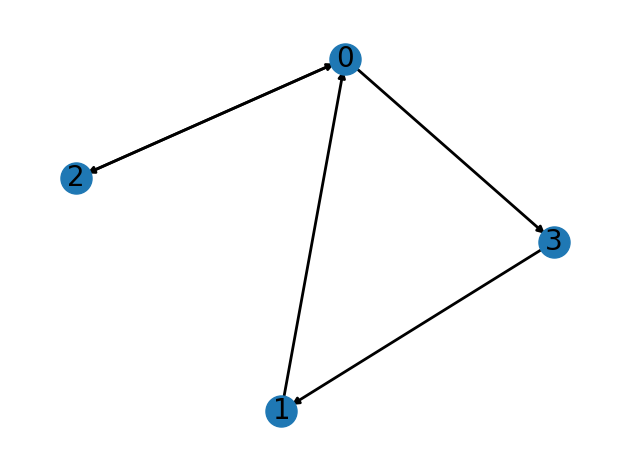

In [13]:
print_graph(G_cr_tour)

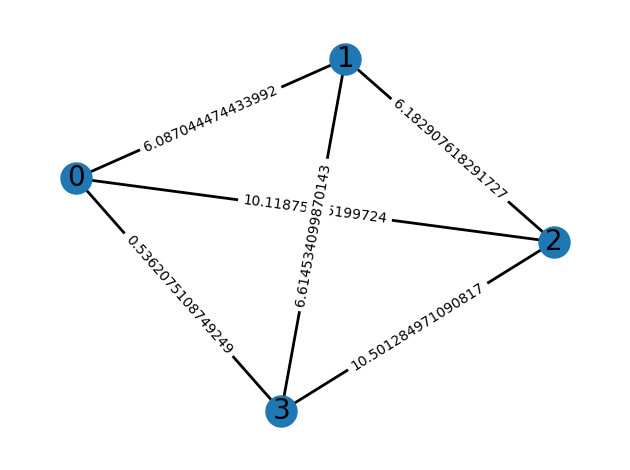

In [11]:
print_graph(G)

In [7]:
G.remove_edges_from(graphs[0][1])

In [8]:
blockages = [
    (3, 4),
    (4, 5),
    (7, 8),
    (9, 10),
    (12, 13),
    (12, 14),
    (13, 14),
    (16, 4),
    (4, 5),
    (8, 10),
    (3, 5),
    (5, 14),
    (5, 10),
    (10, 13),
    (1, 14),
]
G = nx.Graph([(i, i + 1) for i in range(1, 16)] + [(16, 1)])
G_cr_tour = cr.canadian_traveller_cyclic_routing(G, blockages)

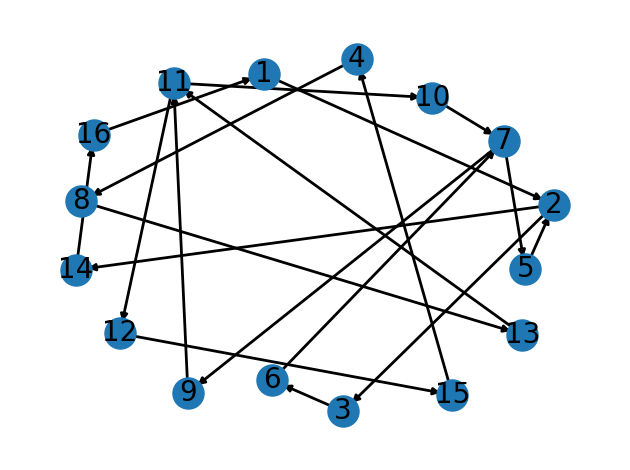

[(16, 1),
 (1, 2),
 (2, 3),
 (3, 6),
 (6, 7),
 (7, 9),
 (9, 11),
 (11, 12),
 (12, 15),
 (15, 4),
 (4, 8),
 (8, 13),
 (13, 11),
 (11, 10),
 (10, 7),
 (7, 5),
 (5, 2),
 (2, 14),
 (14, 16)]

In [9]:
print_graph(G_cr_tour)
G_cr_tour.edges()
list(nx.algorithms.eulerian_circuit(G_cr_tour))

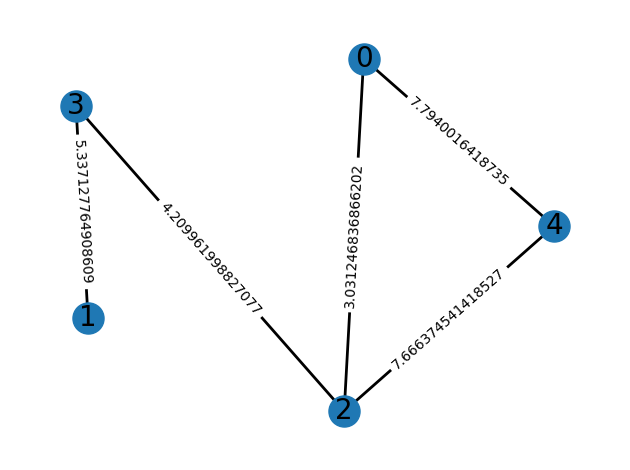

In [25]:
print_graph(G_relabled)

In [27]:
nx.algorithms.has_eulerian_path(G_relabled)

True